In [1]:
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

In [2]:
def get_demo_image():
    z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

In [3]:
def demo_bottom_cbar(fig):
    """
    A grid of 2x2 images with a colorbar for each column.
    """
    grid = AxesGrid(
        fig, 121,  # similar to subplot(121)
        nrows_ncols=(2, 2), axes_pad=0.10, share_all=True,
        label_mode="1", cbar_location="bottom", cbar_mode="edge",
        cbar_pad=0.25, cbar_size="15%", direction="column",
    )
    
    Z, extent = get_demo_image()
    cmaps = ["autumn", "summer"]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, cmap=cmaps[i//2])
        if i % 2:
            grid.cbar_axes[i//2].colorbar(im)
    
    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label("Bar")
    
    # This affects all axes as share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])

In [4]:
def demo_right_cbar(fig):
    """
    A grid of 2x2 images. Each row has its own colorbar.
    """
    grid = AxesGrid(fig, 122,  # similar to subplot(122)
        nrows_ncols=(2, 2), axes_pad=0.10, label_mode="1", share_all=True,
        cbar_location="right", cbar_mode="edge", cbar_size="7%", cbar_pad="2%",
    )
    
    Z, extent = get_demo_image()
    cmaps = ["spring", "winter"]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, cmap=cmaps[i//2])
        if i % 2:
            grid.cbar_axes[i//2].colorbar(im)
    
    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label("Foo")
    
    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])

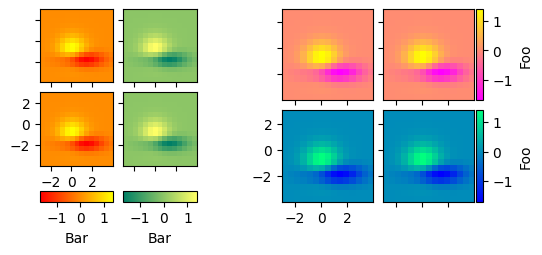

In [5]:
fig = plt.figure(figsize=(5.5, 2.5))
fig.subplots_adjust(left=0.05, right=0.93)

demo_bottom_cbar(fig)
demo_right_cbar(fig)

plt.show()